In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the CSV files
data_file = "D:\population_dataset\API_SP.POP.TOTL_DS2_en_csv_v2_438206.csv"
metadata_file = "D:\population_dataset\Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_438206.csv"

In [3]:
# Read the data
data_df = pd.read_csv(data_file, skiprows=4)
metadata_df = pd.read_csv(metadata_file)

In [4]:
print("Data file:")
print(data_df.head())
print("\nMetadata file:")
print(metadata_df.head())

Data file:
                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0      55811.0      56682.0      57475.0      58178.0   
1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   

          1965  ...         2015         2016         2017         2018  \
0     

In [9]:
print("Data file:")
print(data_df.tail())
print("\nMetadata file:")
print(metadata_df.tail())

Data file:
     Country Name Country Code     Indicator Name Indicator Code        1960  \
261        Kosovo          XKX  Population, total    SP.POP.TOTL    947000.0   
262   Yemen, Rep.          YEM  Population, total    SP.POP.TOTL   5542459.0   
263  South Africa          ZAF  Population, total    SP.POP.TOTL  16520441.0   
264        Zambia          ZMB  Population, total    SP.POP.TOTL   3119430.0   
265      Zimbabwe          ZWE  Population, total    SP.POP.TOTL   3806310.0   

           1961        1962        1963        1964        1965  ...  \
261    966000.0    994000.0   1022000.0   1050000.0   1078000.0  ...   
262   5646668.0   5753386.0   5860197.0   5973803.0   6097298.0  ...   
263  16989464.0  17503133.0  18042215.0  18603097.0  19187194.0  ...   
264   3219451.0   3323427.0   3431381.0   3542764.0   3658024.0  ...   
265   3925952.0   4049778.0   4177931.0   4310332.0   4447149.0  ...   

           2015        2016        2017        2018        2019        2020

In [10]:
data_df.shape

(266, 69)

In [11]:
metadata_df.shape

(265, 6)

In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [13]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   Region        217 non-null    object 
 2   IncomeGroup   216 non-null    object 
 3   SpecialNotes  126 non-null    object 
 4   TableName     265 non-null    object 
 5   Unnamed: 5    0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 12.6+ KB


In [23]:
# Select a recent year for visualization, e.g., 2020
year = '1995'
# Merge data with metadata to get country names
merged_df = data_df[['Country Name', year]].merge(metadata_df[['Country Code', 'Region']], left_on='Country Name', right_on='Country Code')
# Drop rows with missing values
merged_df.dropna(inplace=True)

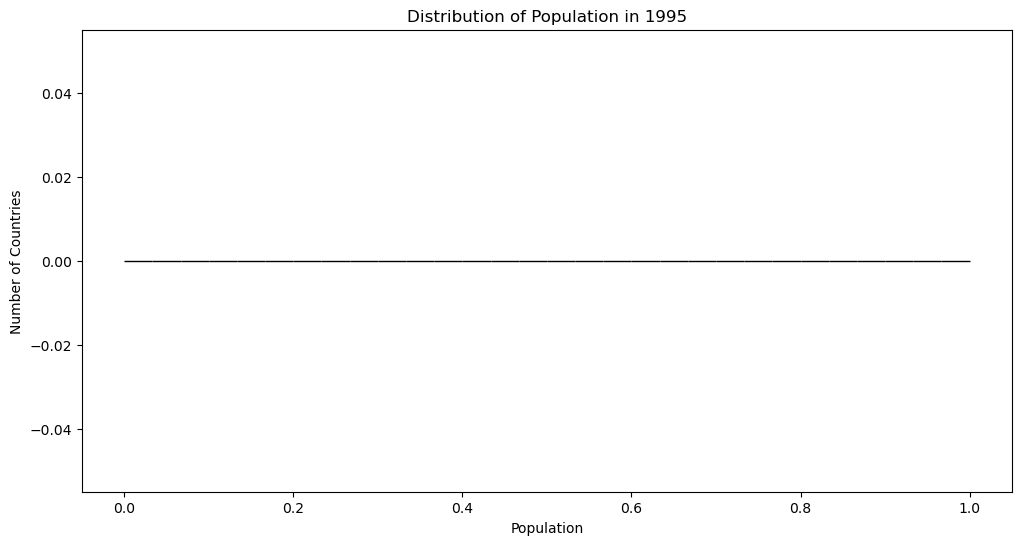

In [24]:
# Plot the distribution of the population in 2020
plt.figure(figsize=(12, 6))
plt.hist(merged_df[year], bins=30, edgecolor='black')
plt.title('Distribution of Population in 1995')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.show()

In [25]:
# Function to plot histograms
def plot_histogram(data, title, xlabel, ylabel):
    if data.empty:
        print(f"No data available for {title}")
        return
    plt.figure(figsize=(12, 6))
    plt.hist(data, bins=30, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [26]:
# Function to plot bar charts
def plot_bar_chart(data, title, xlabel, ylabel):
    if data.empty:
        print(f"No data available for {title}")
        return
    plt.figure(figsize=(12, 6))
    data.value_counts().plot(kind='bar', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


In [27]:
# Select a year for visualization, e.g., 2020
year = '2020'
# Merge data with metadata to get country names
merged_df = data_df[['Country Name', year]].merge(metadata_df[['Country Code', 'Region']], left_on='Country Name', right_on='Country Code', how='left')

# Drop rows with missing values in the population column
merged_df.dropna(subset=[year], inplace=True)

# Fill missing region values with 'Unknown'
merged_df['Region'].fillna('Unknown', inplace=True)

# Convert population to numeric
merged_df[year] = pd.to_numeric(merged_df[year], errors='coerce')

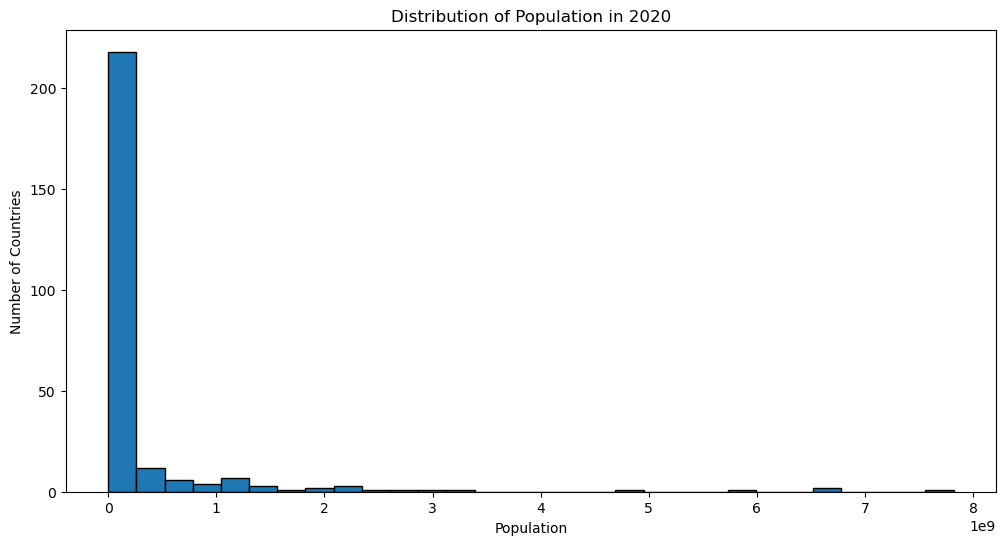

In [34]:
# Plot the distribution of the population in 2020
plot_histogram(merged_df[year], 'Distribution of Population in 2020', 'Population', 'Number of Countries')

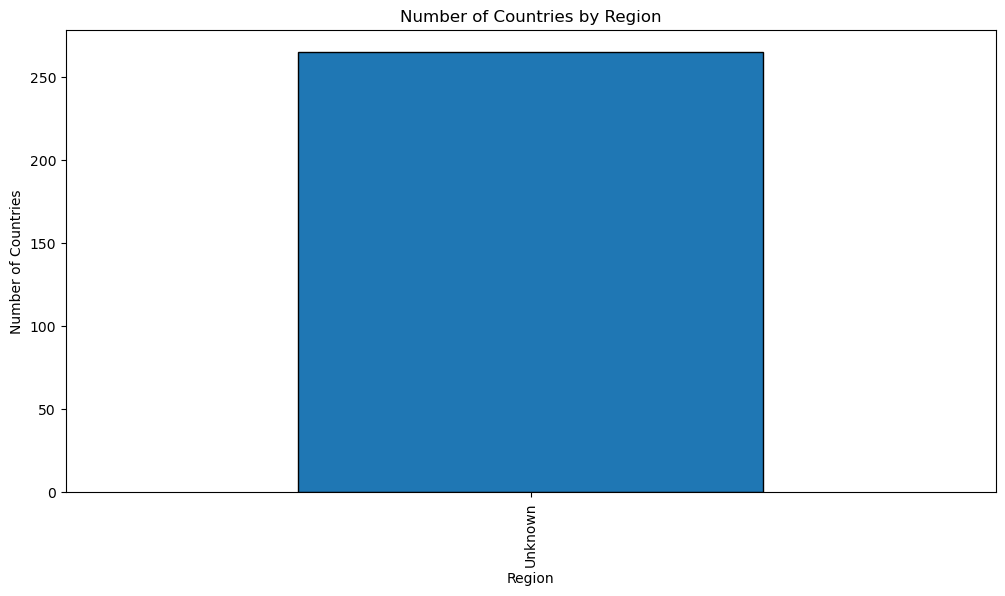

In [33]:
# Plot the number of countries in each region
plot_bar_chart(merged_df['Region'], 'Number of Countries by Region', 'Region', 'Number of Countries')

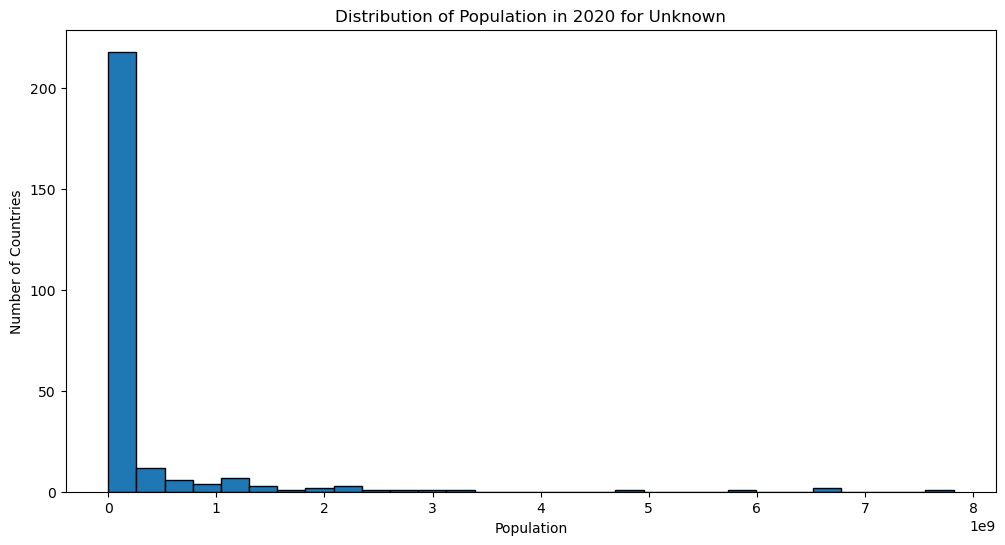

In [35]:
# Plot the distribution of population by region
regions = merged_df['Region'].unique()
for region in regions:
    region_data = merged_df[merged_df['Region'] == region][year]
    plot_histogram(region_data, f'Distribution of Population in 2020 for {region}', 'Population', 'Number of Countries')

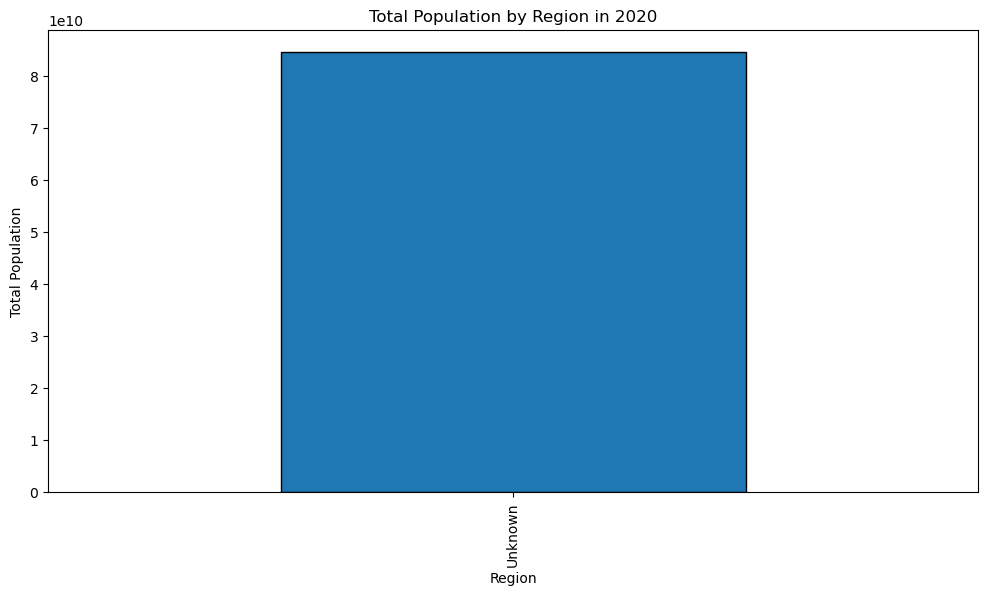

In [31]:
#Population by Region
region_pop = merged_df.groupby('Region')[year].sum()
plt.figure(figsize=(12, 6))
region_pop.plot(kind='bar', edgecolor='black')
plt.title('Total Population by Region in 2020')
plt.xlabel('Region')
plt.ylabel('Total Population')
plt.show()

In [29]:
# Debug statement to check top 10 countries data
print("\nTop 10 countries by population in 2020:")
top_countries = merged_df[['Country Name', year]].nlargest(10, year)
print(top_countries)


Top 10 countries by population in 2020:
                   Country Name          2020
259                       World  7.820206e+09
103            IDA & IBRD total  6.627317e+09
140         Low & middle income  6.549996e+09
156               Middle income  5.882943e+09
102                   IBRD only  4.867092e+09
62   Early-demographic dividend  3.374384e+09
139         Lower middle income  3.117226e+09
249         Upper middle income  2.765717e+09
63          East Asia & Pacific  2.363934e+09
142   Late-demographic dividend  2.317278e+09


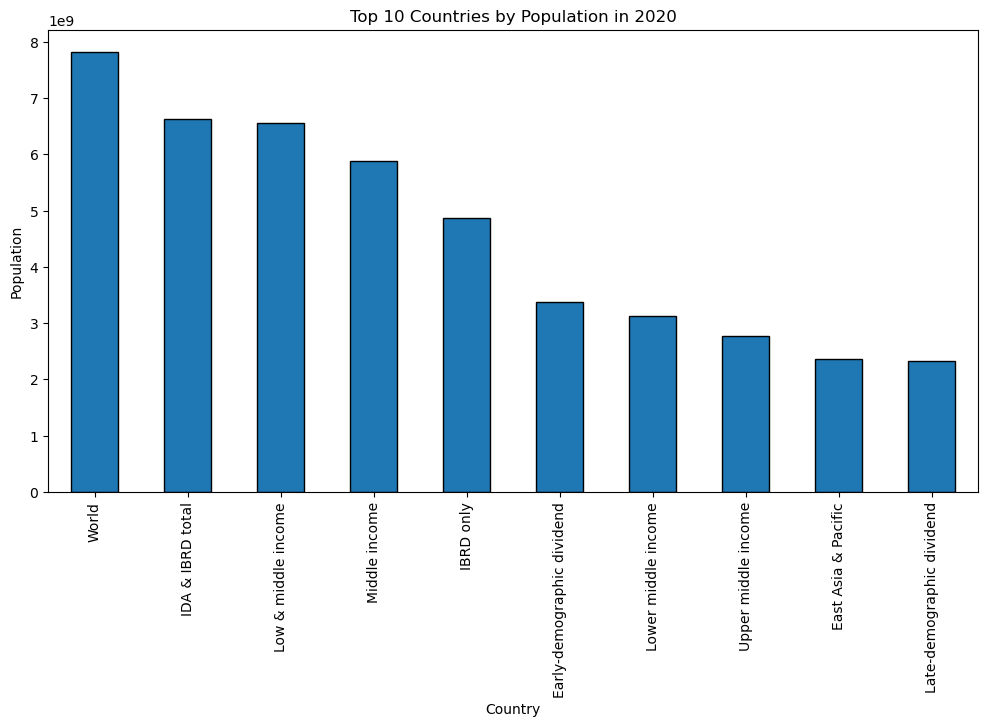

In [30]:
#Top 10 countries by population in 2020
top_countries = top_countries.set_index('Country Name')
plt.figure(figsize=(12, 6))
top_countries[year].plot(kind='bar', edgecolor='black')
plt.title('Top 10 Countries by Population in 2020')
plt.xlabel('Country')
plt.ylabel('Population')
plt.show()